In [1]:
from read_LAMMPS import *
from utils import load

In [48]:
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2.lammpstrj"
#in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_1.lammpstrj"
in_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_10e4.lammpstrj"
out_file = "lamp2_1e-4.npy"
vid_file = "lamp.mp4"
#vel_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_1.myvel"
vel_file = "C:\\Users\\nerpa\\Dropbox\\Research\\discrete_sr\\code\\python\\dump_test2_10e4.myvel"


num_dimensions = 2
#timestep = 0.001
timestep = 0.0001

dump_to_traj(in_file, out_file, num_dimensions, timestep)
#dump_to_traj(in_file, out_file, num_dimensions, timestep, vel_file)

In [49]:
pos, vs, dt, dims = load(out_file, 4)
print(dims)
print(dt)
print(pos.shape, vs.shape)

[   1.01138514 1001.        ]
0.001
(320, 2, 1001) (320, 2, 1001)


In [50]:
from findiff import FinDiff
v_diff = FinDiff((2, timestep, 1), acc=4)
dvs = v_diff(vs) # compute velocities by finite differencing
quadratic_variation = np.mean(dvs**2)
print(quadratic_variation)
#2259226.2512599262
#28331.52798886305
# -> 8.93**2 difference

1650543979.3774412


In [51]:
from scipy.stats.stats import pearsonr 
v_diff = FinDiff((2, timestep, 1), acc=4)
vs_2 = v_diff(pos)*0.1 # compute velocities by finite differencing
vs_2[np.abs(vs_2)>1000] = 0
print(vs[1:10, :, 10], "\n", vs_2[1:10, :, 10])
dvs_2 = v_diff(vs_2) # compute velocities by finite differencing
qv_2 = np.mean(dvs_2**2)
print(qv_2)

[[ 0.00191667 -0.00533333]
 [-0.00241667  0.01575   ]
 [ 0.00291667  0.003     ]
 [ 0.00291667 -0.00975   ]
 [-0.00675     0.00016667]
 [ 0.00416667  0.00308333]
 [ 0.00191667  0.00366667]
 [-0.01008333  0.00358333]
 [ 0.009925    0.00658333]] 
 [[ 0.00191667 -0.00533333]
 [-0.00241667  0.01575   ]
 [ 0.00291667  0.003     ]
 [ 0.00291667 -0.00975   ]
 [-0.00675     0.00016667]
 [ 0.00416667  0.00308333]
 [ 0.00191667  0.00366667]
 [-0.01008333  0.00358333]
 [ 0.009925    0.00658333]]
1650543979.3774416


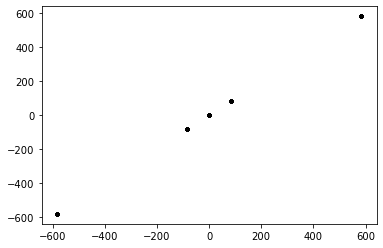

In [52]:
import matplotlib.pyplot as plt
plt.plot(vs.flatten(), vs_2.flatten(), 'k.')

0
0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


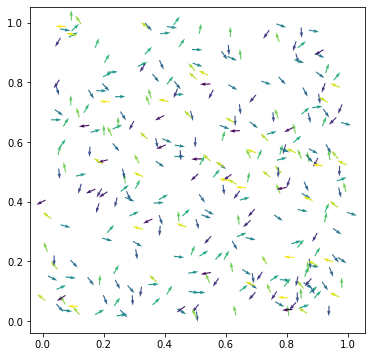

In [47]:
make_video(out_file, vid_file)